In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from os import listdir
from os.path import isfile, join
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

with open('PA3_train.tsv') as f:
    Y_train, X_train = zip(*[(int(line[0]), line[4:]) for line in f.readlines() if (line[0] == line[2])])

with open('PA3_test.tsv') as f:
    Y_test, X_test = zip(*[(int(line[0]), line[2:]) for line in f.readlines()])

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



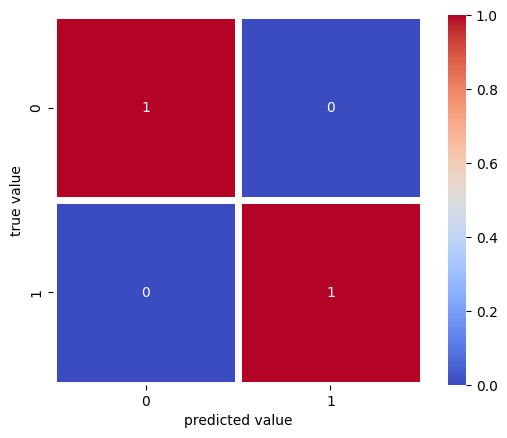

In [7]:

def disp_result(y_test, y_predict):
    print(accuracy_score(y_test, y_predict))
    print(classification_report(y_test, y_predict))
    mat = confusion_matrix(y_test, y_predict)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, \
                cmap='coolwarm', linewidths=5)
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()

v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
model = MultinomialNB()
model.fit(X_train_count, Y_train)
y_predict = model.predict(v.transform(X_test))
disp_result(Y_test, y_predict)